Link:https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.18k/6.18k [00:00<00:00, 9.99MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('heart.csv')

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
pip install scikit-learn

In [10]:
from os import X_OK
from sklearn.model_selection import train_test_split

X,y = df.drop('target', axis=1), df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

In [11]:
from sklearn.ensemble import RandomForestClassifier  ##insensticve


forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [12]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### Scale senestiveT

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC()

Scores Check
Accuracy

In [18]:
forest.score(X_test, y_test)

0.9853658536585366

In [19]:
nb_clf.score(X_test, y_test)


0.8463414634146341

In [20]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [21]:
knn_clf.score(X_test_scaled, y_test)

0.8536585365853658

In [22]:
log_clf.score(X_test_scaled, y_test)

0.8731707317073171

In [23]:
svm_clf.score(X_test_scaled, y_test)

0.9341463414634147

In [24]:
from sklearn.metrics import recall_score
y_pred = forest.predict(X_test)
print("Forest:", recall_score(y_test, y_pred))

y_pred = nb_clf.predict(X_test)
print("Forest:", recall_score(y_test, y_pred))
y_pred = gb_clf.predict(X_test)
print("Forest:", recall_score(y_test, y_pred))
y_pred = knn_clf.predict(X_test)
print("Forest:", recall_score(y_test, y_pred))
y_pred = log_clf.predict(X_test)
print("Forest:", recall_score(y_test, y_pred))
y_pred = svm_clf.predict(X_test)
print("Forest:", recall_score(y_test, y_pred))


Forest: 0.9859154929577465
Forest: 0.9014084507042254
Forest: 0.9859154929577465
Forest: 0.7934272300469484
Forest: 0.046948356807511735
Forest: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


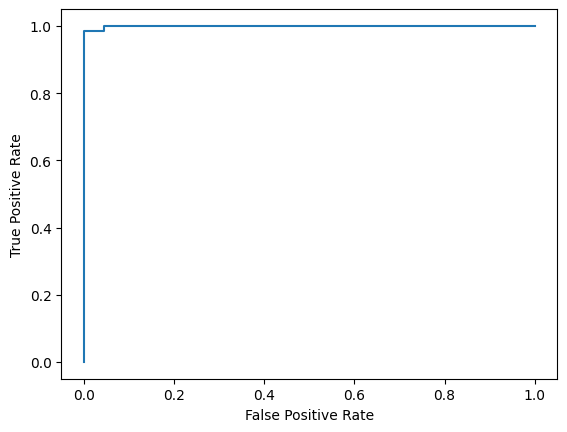

In [25]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve,roc_auc_score

y_probab = forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probab)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [26]:
roc_auc_score(y_test, y_probab)

np.float64(0.9993565453635519)

In [27]:
### HYper paramater tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators' : [100,200,500,600,700],
  #  'max_depth'    : [None, 10,20,30],
   # 'min_samples_leaf' : [1,2,4],
   # 'min_samples_split' : [2,5,10],
    #'max_features': ['sqrt', 'log2', None]
}
forest = RandomForestClassifier(n_jobs = -1,random_state=9)
grid_search = GridSearchCV(forest,param_grid, cv = 3, n_jobs =-1, verbose=2)


In [31]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500, 600, 700]},
             verbose=2)

In [32]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

In [49]:
best_forest.score(X_test, y_test)

0.9853658536585366

AttributeError: 'RandomForestClassifier' object has no attribute 'recall_score'

In [35]:
#Feature Importance


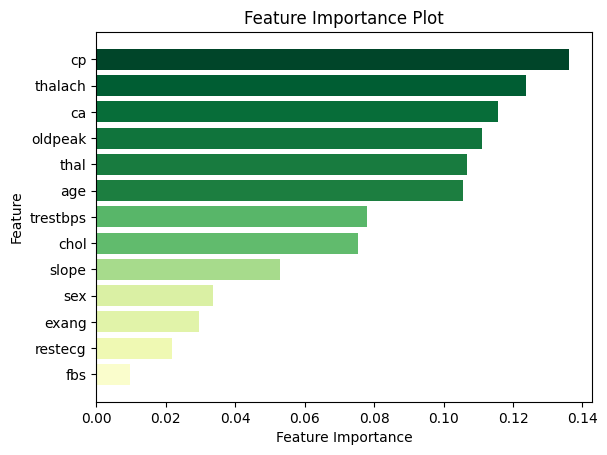

In [39]:
import numpy as np
fi = best_forest.feature_importances_
fei = best_forest.feature_names_in_

sorted_idx = np.argsort(fi)
sorted_fei = fei[sorted_idx]
sorted_fi = fi[sorted_idx]

colors = plt.cm.YlGn(sorted_fi / max(sorted_fi))

plt.barh(sorted_fei, sorted_fi, color=colors)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

In [41]:
import seaborn as sns

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

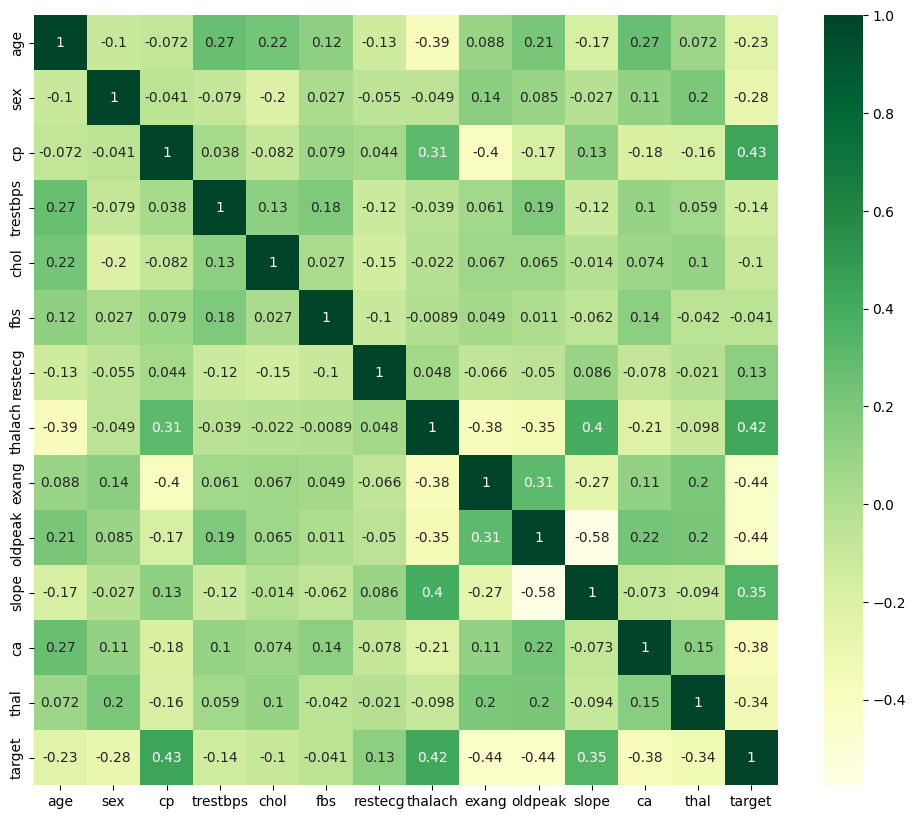

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap="YlGn")


<Axes: >

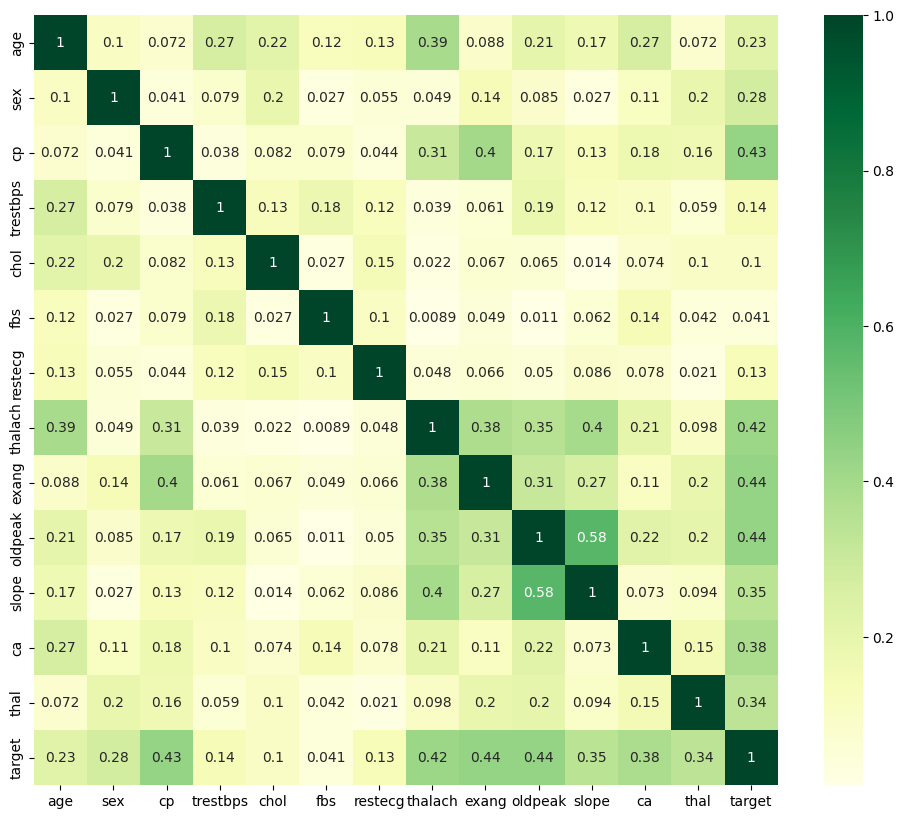

In [48]:
 plt.figure(figsize=(12,10))
 sns.heatmap(abs(df.corr()), annot=True,cmap="YlGn")